In [1]:
%load_ext autoreload
%autoreload 2

# IBEXtractor2D 
# 2D IBEX anaysis pipeline for regional and single cell data
# Sample_05

### Last edit 03/04/2023

In [2]:
# %%capture
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
os.chdir('/nfs/team205/ny1/ThymusSpatialAtlas/ImageSpot/')
import ibextractor2d as ie
import squidpy as sq




In [3]:
# load nucelr stained image and metadata
path = '/lustre/scratch126/cellgen/team205/ny1/IBEX/Thymus/Sample_05/'
meta_data = pd.read_csv(path+'Meta_Sample_05_040423.csv')
nuc_channel = 9
print(meta_data['protein'][nuc_channel])
nuc_path = path+'series/'+meta_data['file'][nuc_channel]
print(nuc_path)


Hoechst
/lustre/scratch126/cellgen/team205/ny1/IBEX/Thymus/Sample_05/series/Sample_05_THY45_Z5_ch0009.tif


In [4]:
meta_data

channel  protein            gene  exclude  color  show  comment  \
0         1     CD99             NaN    False    NaN   NaN      NaN   
1         2    CD163             NaN    False    NaN   NaN      NaN   
2         3    CD11C             NaN    False    NaN   NaN      NaN   
3         4  Hoechst             NaN     True    NaN   NaN      NaN   
4         5      CD8             NaN    False    NaN   NaN      NaN   
5         6      CD3             NaN    False    NaN   NaN      NaN   
6         7     CHGA  Chromogranin A    False    NaN   NaN      NaN   
7         8      CD5             NaN    False    NaN   NaN      NaN   
8         9      CD7             NaN    False    NaN   NaN      NaN   
9        10  Hoechst             NaN    False    NaN   NaN      NaN   
10       11     CD20             NaN    False    NaN   NaN      NaN   
11       12     CD34             NaN    False    NaN   NaN      NaN   
12       13     CD21             NaN     True    NaN   NaN      NaN   
13       14     CD31             NaN    False    NaN   NaN      NaN   
14       15     CD25             NaN     True    NaN   NaN      NaN   
15       16  Hoechst             NaN     True    NaN   NaN      NaN   
16       17      CD4             NaN    False    NaN   NaN      NaN   
17       18    TUBB3             NaN    False    NaN   NaN      NaN   
18       19    FOXP3             NaN    False    NaN   NaN      NaN   
19       20    VA7_2             NaN    False    NaN   NaN      NaN   
20       21     CD39             NaN    False    NaN   NaN      NaN   
21       22     PCP4             NaN    False    NaN   NaN      NaN   
22       23    CD206             NaN    False    NaN   NaN      NaN   
23       24    SPARC             NaN    False    NaN   NaN      NaN   
24       25  Hoechst             NaN     True    NaN   NaN      NaN   
25       26     LMNA             NaN    False    NaN   NaN      NaN   
26       27    HLADR             NaN    False    NaN   NaN      NaN   
27       28    CD123             NaN    False    NaN   NaN      NaN   
28       29   DEC205             NaN    False    NaN   NaN      NaN   
29       30     AQP1             NaN    False    NaN   NaN      NaN   
30       31  Hoechst             NaN     True    NaN   NaN      NaN   
31       32      DES             NaN    False    NaN   NaN      NaN   
32       33    CD138             NaN    False    NaN   NaN      NaN   
33       34     AIRE             NaN     True    NaN   NaN      NaN   
34       35     KI67             NaN    False    NaN   NaN      NaN   
35       36    CD49A             NaN    False    NaN   NaN      NaN   
36       37  Hoechst             NaN     True    NaN   NaN      NaN   
37       38    CD49F             NaN    False    NaN   NaN      NaN   
38       39      LUM             NaN    False    NaN   NaN      NaN   
39       40    LYVE1             NaN    False    NaN   NaN      NaN   
40       41    KRT15             NaN    False    NaN   NaN      NaN   
41       42    KRT10             NaN     True    NaN   NaN      NaN   
42       43      VIM             NaN    False    NaN   NaN      NaN   
43       44    KRT14             NaN    False    NaN   NaN      NaN   
44       45  Hoechst             NaN     True    NaN   NaN      NaN   
45       46     CD68             NaN    False    NaN   NaN      NaN   
46       47    ANXA1             NaN    False    NaN   NaN      NaN   
47       48     IRF4             NaN    False    NaN   NaN      NaN   
48       49     CD15             NaN    False    NaN   NaN      NaN   
49       50    GDTCR             NaN    False    NaN   NaN      NaN   
50       51  Hoechst             NaN     True    NaN   NaN      NaN   
51       52     CD44             NaN    False    NaN   NaN      NaN   
52       53     CD45             NaN    False    NaN   NaN      NaN   
53       54      SYP             NaN    False    NaN   NaN      NaN   
54       55     KRT5             NaN    False    NaN   NaN      NaN   
55       56     KRT8        

In [ ]:
ie.ibextractor_feature_pipeline(
    path=path,
    meta_data=meta_data,
    sample_name='Sample_05',
    im=im, 
    ppm=ppm,
    expected_diam=8, 
    perif_r = [10.5,25.5],
    
)

# Tissue Morphology part 

In [18]:
%load_ext autoreload
%autoreload 2

In [20]:
# load tissue annotations from jupyter annotator 
tissue_annotations,tissue_annotations_labels,_ = ja.load_annotation(path+'tissue_annotations/','annotation_tissue')
annotation_lobules_0,annotation_lobules_0_labels,_ = ja.load_annotation(path+'tissue_annotations/','annotation_lobules_0')
annotation_lobules_1,annotation_lobules_1_labels,_ = ja.load_annotation(path+'tissue_annotations/','annotation_lobules_1')
annotation_lobules_0_labels[0] = 'unassigned'
annotation_lobules_1_labels[0] = 'unassigned'

loaded annotation image - annotation_tissue size - (2704, 3948)
loaded annotations
{1: 'unassigned', 2: 'Artifacts', 3: 'Medulla', 4: 'Cortex', 5: 'Edge', 6: 'HS', 7: 'Vessels', 8: 'PVS'}
loaded ppm
{'ppm': 1}
loaded annotation image - annotation_lobules_0 size - (2704, 3948)
loaded annotations
{1: 'lobules_0', 2: 'lobules_1', 3: 'lobules_2', 4: 'lobules_3', 5: 'lobules_4', 6: 'lobules_5', 7: 'lobules_6', 8: 'lobules_7', 9: 'lobules_8', 10: 'lobules_9'}
loaded ppm
{'ppm': 1}
loaded annotation image - annotation_lobules_1 size - (2704, 3948)
loaded annotations
{1: 'lobules_0', 2: 'lobules_1', 3: 'lobules_2', 4: 'lobules_3', 5: 'lobules_4', 6: 'lobules_5', 7: 'lobules_6', 8: 'lobules_7', 9: 'lobules_8', 10: 'lobules_9', 11: 'lobules_10', 12: 'lobules_11', 13: 'lobules_12', 14: 'lobules_13', 15: 'lobules_14', 16: 'lobules_15', 17: 'lobules_16', 18: 'lobules_17', 19: 'lobules_18', 20: 'lobules_19', 21: 'lobules_20', 22: 'lobules_21', 23: 'lobules_22', 24: 'lobules_23', 25: 'lobules_24', 26

In [21]:
%%time
# it's critical not to split cell part and recalculate the df everytime you cahnge the dist2cluster resolution - I have an overflow bug somewhere that I need to fix
df = ie.grid_anno(
    im,
    [tissue_annotations,annotation_lobules_0,annotation_lobules_1],
    ['tissue_annotations','annotation_lobules_0','annotation_lobules_1'],
    [tissue_annotations_labels,annotation_lobules_0_labels,annotation_lobules_1_labels],
    spot_diameter=15,
    pixels_per_micron=ppm
)
df = df.iloc[np.where(df['tissue_annotations']!='unassigned')[0],:]
df

generating grid with spot size - 15, with resolution of - 3.519961 ppm
tissue_annotations


47520it [00:08, 5548.71it/s]


annotation_lobules_0


47520it [00:08, 5492.34it/s]


annotation_lobules_1


47520it [00:07, 6202.56it/s]


CPU times: user 25 s, sys: 141 ms, total: 25.1 s
Wall time: 25 s


x            y tissue_annotations  \
index                                                 
155       52.799416  8203.203125             Cortex   
156       52.799416  8255.786133             Cortex   
157       52.799416  8308.369141             Cortex   
158       52.799416  8360.952148             Cortex   
159       52.799416  8413.536133             Cortex   
...             ...          ...                ...   
47116  13634.451172  7230.520508               Edge   
47291  13739.326172  6967.604492               Edge   
47292  13739.326172  7020.187500               Edge   
47293  13739.326172  7072.770996               Edge   
47294  13739.326172  7125.354004               Edge   

       tissue_annotations_number annotation_lobules_0  \
index                                                   
155                            4            lobules_6   
156                            4            lobules_6   
157                            4            lobules_6   
158                            4            lobules_6   
159                            4            lobules_6   
...                          ...                  ...   
47116                          5            lobules_0   
47291                          5            lobules_0   
47292                          5            lobules_0   
47293                          5            lobules_0   
47294                          5            lobules_0   

       annotation_lobules_0_number annotation_lobules_1  \
index                                                     
155                              7            lobules_0   
156                              7            lobules_0   
157                              7            lobules_0   
158                              7            lobules_0   
159                              7            lobules_0   
...                            ...                  ...   
47116                            1           lobules_25   
47291                            1           lobules_25   
47292                            1           lobules_25   
47293                            1           lobules_25   
47294                            1           lobules_25   

       annotation_lobules_1_number  
index                               
155                              1  
156                              1  
157                              1  
158                              1  
159                              1  
...                            ...  
47116                           26  
47291                           26  
47292                           26  
47293                           26  
47294                           26  

[23662 rows x 8 columns]

(-631.5269222259521,
 14423.652509689331,
 -306.08662261962894,
 9903.069136047363)

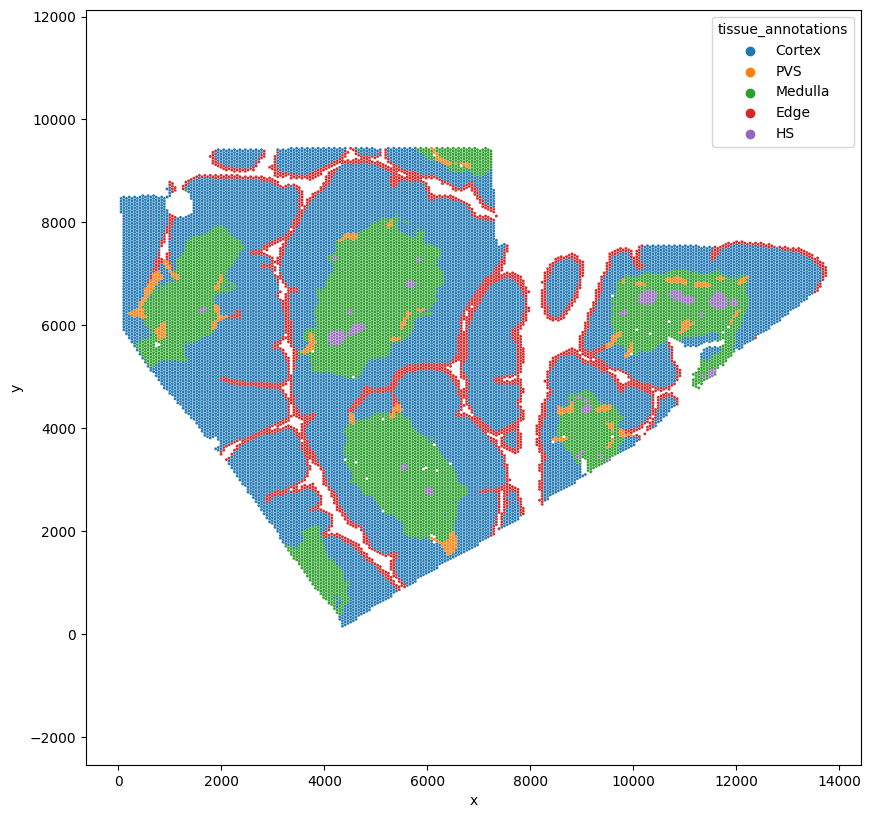

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(dpi=100, figsize=[10,10])
sns.scatterplot(df['x'],df['y'],hue=df['tissue_annotations'],s=5)
plt.grid(False)
# plt.title('cma_bin_manual_v3')
plt.axis('equal')
# plt.savefig('/nfs/team205/ny1/ThymusSpatialAtlas/Figure2/IBEX/CMA_bin.pdf')  

In [23]:
df['tissue_annotations_full'] = df['tissue_annotations']
df['tissue_annotations_full'].loc[np.array(df['tissue_annotations_full']=='HS')] = 'Medulla'

In [24]:
# calculate distance matrix between all the spots - need to speed up this point 
from scipy.spatial import distance_matrix, distance
a = np.vstack([df['x'],df['y']])
distM = distance.cdist(a.T,a.T, metric='euclidean')
Dist2Cluster_lv_0 = ie.dist2cluster(df,'tissue_annotations_full',distM,resolution=5).copy()
df

x            y tissue_annotations  \
index                                                 
155       52.799416  8203.203125             Cortex   
156       52.799416  8255.786133             Cortex   
157       52.799416  8308.369141             Cortex   
158       52.799416  8360.952148             Cortex   
159       52.799416  8413.536133             Cortex   
...             ...          ...                ...   
47116  13634.451172  7230.520508               Edge   
47291  13739.326172  6967.604492               Edge   
47292  13739.326172  7020.187500               Edge   
47293  13739.326172  7072.770996               Edge   
47294  13739.326172  7125.354004               Edge   

       tissue_annotations_number annotation_lobules_0  \
index                                                   
155                            4            lobules_6   
156                            4            lobules_6   
157                            4            lobules_6   
158                            4            lobules_6   
159                            4            lobules_6   
...                          ...                  ...   
47116                          5            lobules_0   
47291                          5            lobules_0   
47292                          5            lobules_0   
47293                          5            lobules_0   
47294                          5            lobules_0   

       annotation_lobules_0_number annotation_lobules_1  \
index                                                     
155                              7            lobules_0   
156                              7            lobules_0   
157                              7            lobules_0   
158                              7            lobules_0   
159                              7            lobules_0   
...                            ...                  ...   
47116                            1           lobules_25   
47291                            1           lobules_25   
47292                            1           lobules_25   
47293                            1           lobules_25   
47294                            1           lobules_25   

       annotation_lobules_1_number tissue_annotations_full  \
index                                                        
155                              1                  Cortex   
156                              1                  Cortex   
157                              1                  Cortex   
158                              1                  Cortex   
159                              1                  Cortex   
...                            ...                     ...   
47116                           26                    Edge   
47291                           26                    Edge   
47292                           26                    Edge   
47293                           26                    Edge   
47294                           26                    Edge   

       L2_dist_tissue_annotations_full_Cortex  \
index                                           
155                                 58.935426   
156                                 52.583008   
157                                 52.583008   
158                                 52.583984   
159                                 52.583984   
...                                       ...   
47116                              141.765335   
47291                              117.319179   
47292                              117.319179   
47293                              148.521915   
47294                              159.834053   

       L2_dist_tissue_annotations_full_Edge  \
index                                         
155                              945.336962   
156                              956.965000   
157                              975.063811   
158                              995.206803   
159                              995.207113   
...               

## axis calculations

In [25]:
import seaborn as sns
ct_order = ['Capsular','Sub-Capsular','Cortical level I','Cortical level II','Cortical level III','Cortical CMJ','Medullar CMJ','Medullar level I','Medullar level II','Medullar level III','Medullar Deep']
ct_color_map = dict(zip(ct_order, np.array(sns.color_palette("tab20", len(ct_order)))[range(len(ct_order))]))

In [26]:
# axis v2
fcm = 0.8
fce = 0.2
CorticoMedullarDistall = ie.axis_2p_norm(Dist2Cluster_lv_0,['Cortex','Medulla'])
CorticoEdgeDistAxisall = ie.axis_2p_norm(Dist2Cluster_lv_0,['Edge','Cortex'])
CorticoMedullarAxisall = np.sum([fcm*CorticoMedullarDistall,fce*CorticoEdgeDistAxisall],axis=0)
df['cma_v2'] = CorticoMedullarAxisall
# binned axis
ct2_values = [-0.66,-0.59,-0.55,-0.4,-0.3,0.05,0.5,0.6,0.7,0.75]
df = ie.bin_axis(ct_order ,ct2_values,df,'cma_v2')   
df.loc[df['tissue_annotations']=='Edge','manual_bin_cma_v2'] = 'Capsular'
df['manual_bin_cma_v2'].value_counts()

Sub-Capsular
-0.66,-0.59
Cortical level I
-0.59,-0.55
Cortical level II
-0.55,-0.4
Cortical level III
-0.4,-0.3
Cortical CMJ
-0.3,0.05
Medullar CMJ
0.05,0.5
Medullar level I
0.5,0.6
Medullar level II
0.6,0.7
Medullar level III
0.7,0.75


Cortical level II     4804
Capsular              3177
Sub-Capsular          2915
Medullar level II     2472
Cortical level I      2332
Cortical CMJ          1977
Medullar CMJ          1817
Cortical level III    1445
Medullar level III    1239
Medullar level I      1177
Medullar Deep          307
Name: manual_bin_cma_v2, dtype: int64

In [27]:
df = ie.axis_3p_norm(Dist2Cluster_lv_0, ['Cortex','Medulla','Edge'], df, axis_anno='cma_v3')
ct3_values = [-1.82,-1.6,-1.2,-0.75,-0.3,0,0.5,0.7,0.8,0.86]
df = ie.bin_axis(ct_order ,ct3_values,df,'cma_v3')   
df.loc[df['tissue_annotations']=='Edge','manual_bin_cma_v3'] = 'Capsular'
df['manual_bin_cma_v3'].value_counts()


Sub-Capsular
-1.82,-1.6
Cortical level I
-1.6,-1.2
Cortical level II
-1.2,-0.75
Cortical level III
-0.75,-0.3
Cortical CMJ
-0.3,0
Medullar CMJ
0,0.5
Medullar level I
0.5,0.7
Medullar level II
0.7,0.8
Medullar level III
0.8,0.86


Cortical level I      4439
Cortical level II     3212
Sub-Capsular          2946
Capsular              2840
Cortical level III    2745
Medullar level I      1918
Medullar CMJ          1657
Medullar level II     1593
Medullar level III    1214
Cortical CMJ           707
Medullar Deep          391
Name: manual_bin_cma_v3, dtype: int64

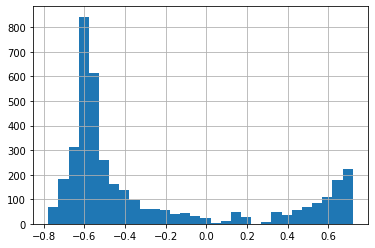

<AxesSubplot:>

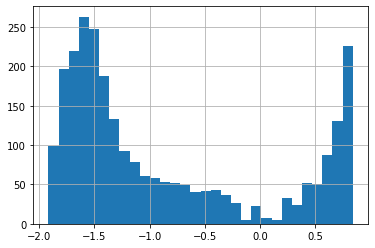

In [28]:
df['cma_v2'][df['annotation_lobules_1'].isin(['lobules_2','lobules_4','lobules_3'])].hist(bins=30)
plt.show()
df['cma_v3'][df['annotation_lobules_1'].isin(['lobules_2','lobules_4','lobule_3s'])].hist(bins=30)

# df['cma_v3'][df['Annotation_lobules_0'].isin(['lobule_2','lobule_4','lobule_3'])].hist(bins=100)

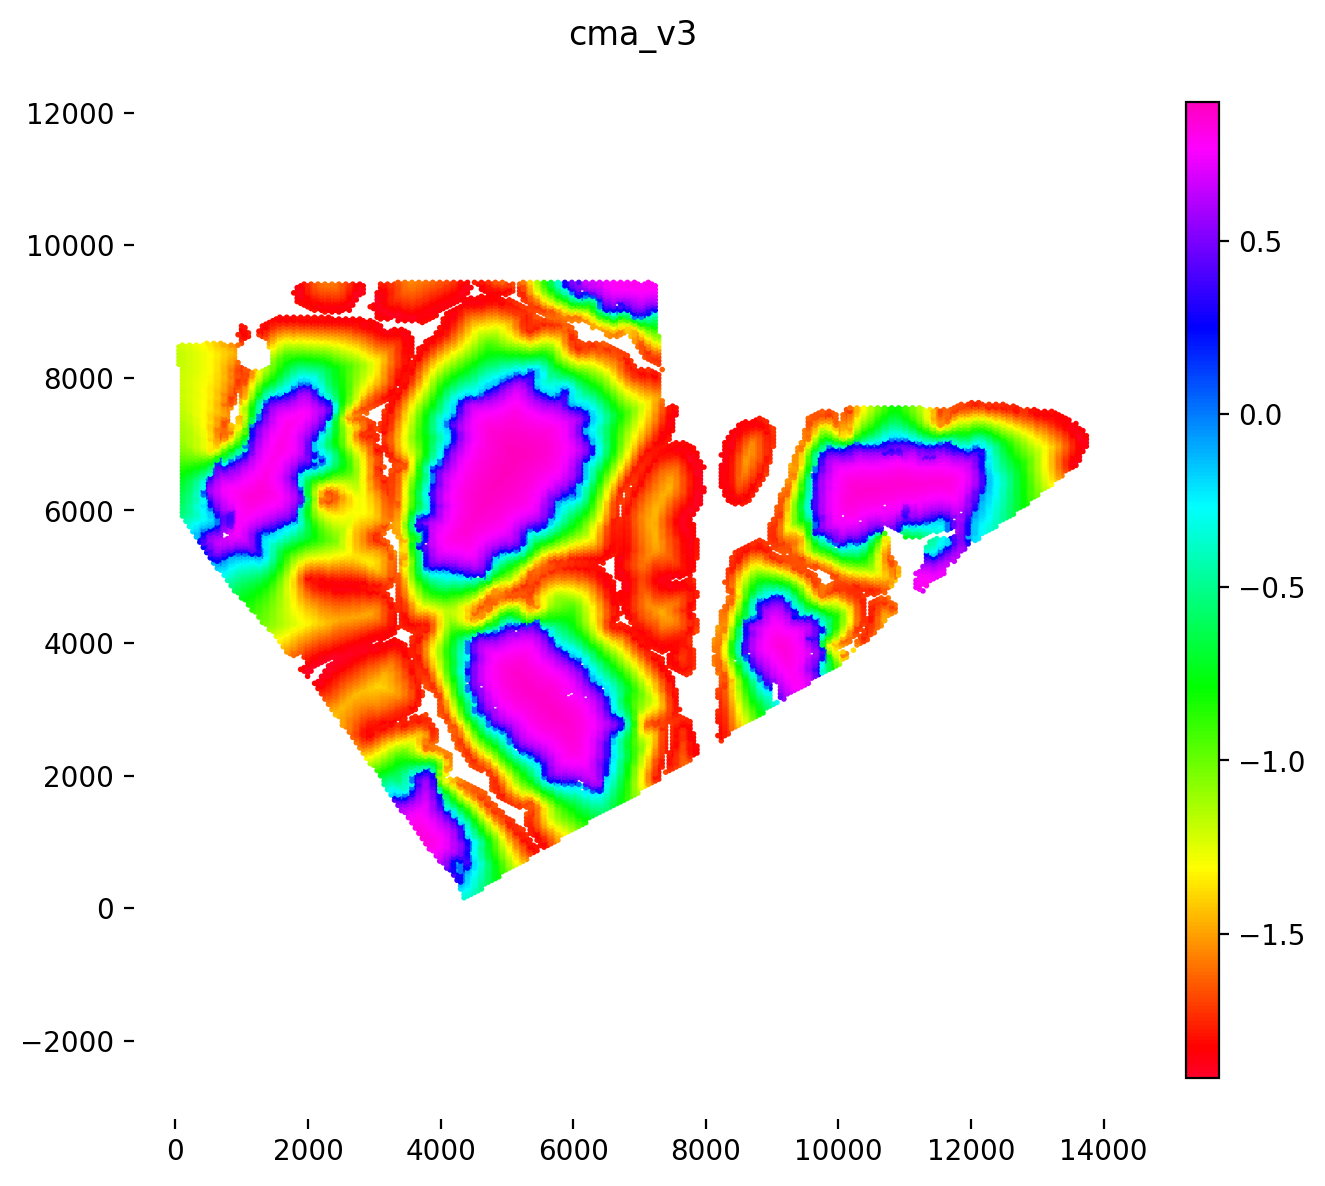

In [29]:
# fig, ax = plt.subplots()
plt.figure(dpi=200, figsize=[7,7])
plt.scatter(df['x'],df['y'],c=df['cma_v3'],cmap='gist_rainbow',s=1,)
# plt.scatter(df['x'],df['y'],c=(df['tissue_annotations']=='Cortex'),s=8,)
plt.grid(False)
plt.title('cma_v3')
plt.colorbar(aspect=30,fraction=0.03)
plt.axis('equal')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
# plt.savefig('/nfs/team205/ny1/ThymusSpatialAtlas/Figure2/IBEX/CMA_cont.pdf')  

plt.show()

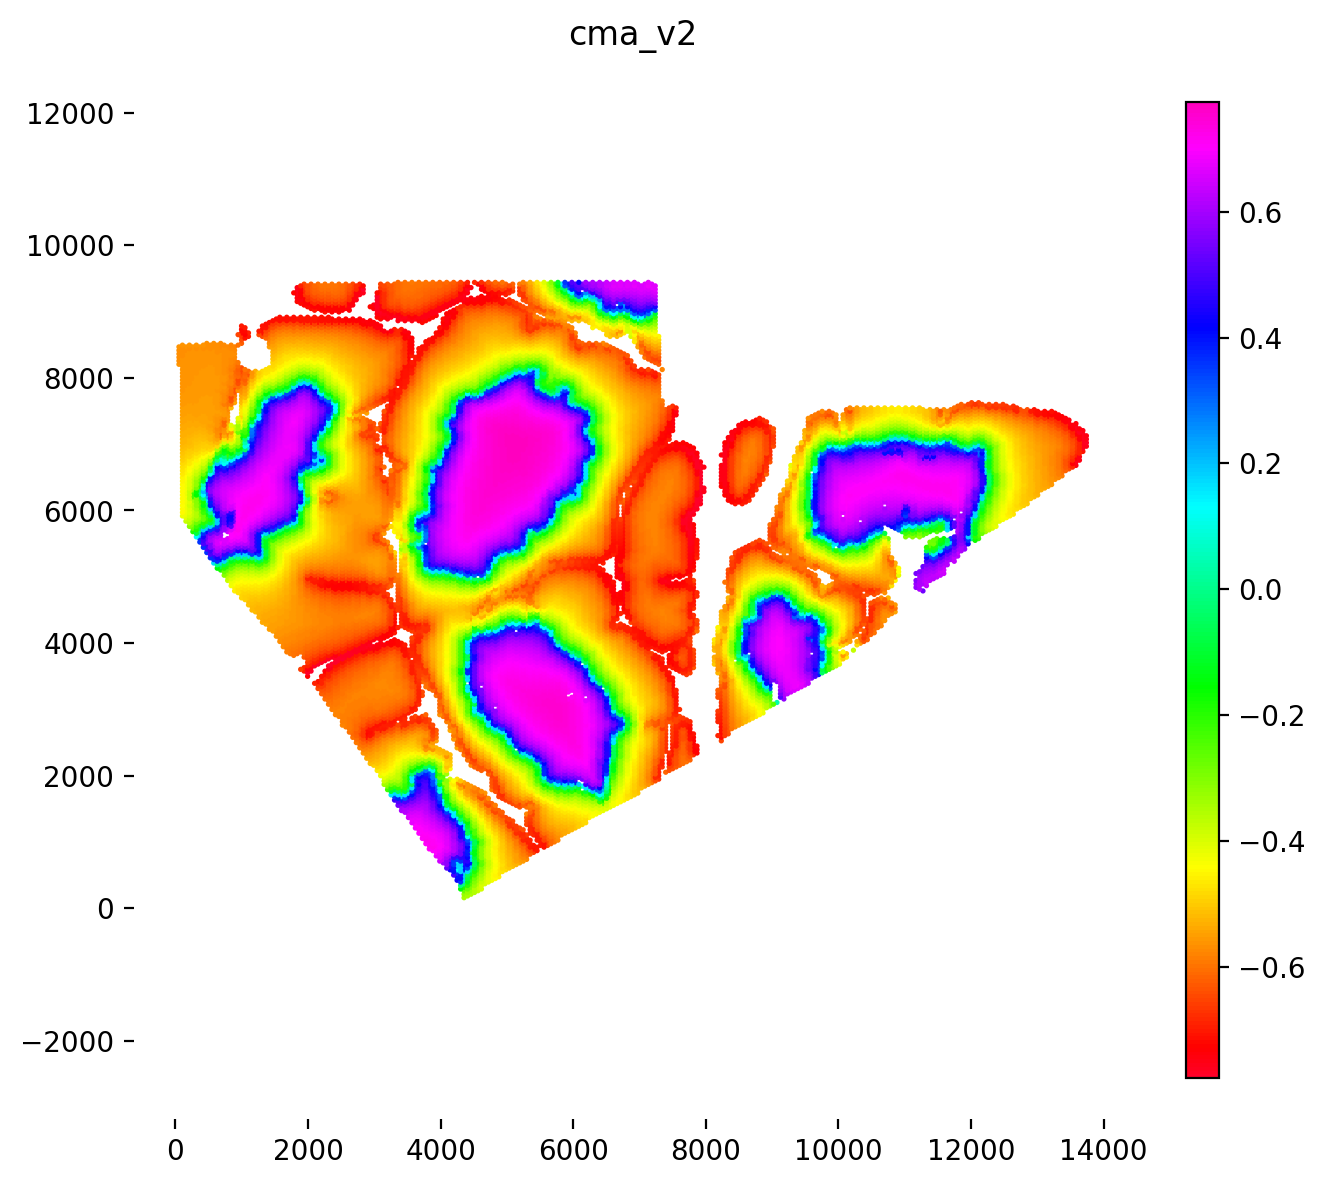

In [30]:
# fig, ax = plt.subplots()
plt.figure(dpi=200, figsize=[7,7])
plt.scatter(df['x'],df['y'],c=df['cma_v2'],cmap='gist_rainbow',s=0.8,)
# plt.scatter(df['x'],df['y'],c=(df['tissue_annotations']=='Cortex'),s=8,)
plt.grid(False)
plt.title('cma_v2')
plt.colorbar(aspect=30,fraction=0.03)
plt.axis('equal')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
# plt.savefig('/nfs/team205/ny1/ThymusSpatialAtlas/Figure2/IBEX/CMA_cont.pdf')  

plt.show()

(-631.5269222259521,
 14423.652509689331,
 -306.08662261962894,
 9903.069136047363)

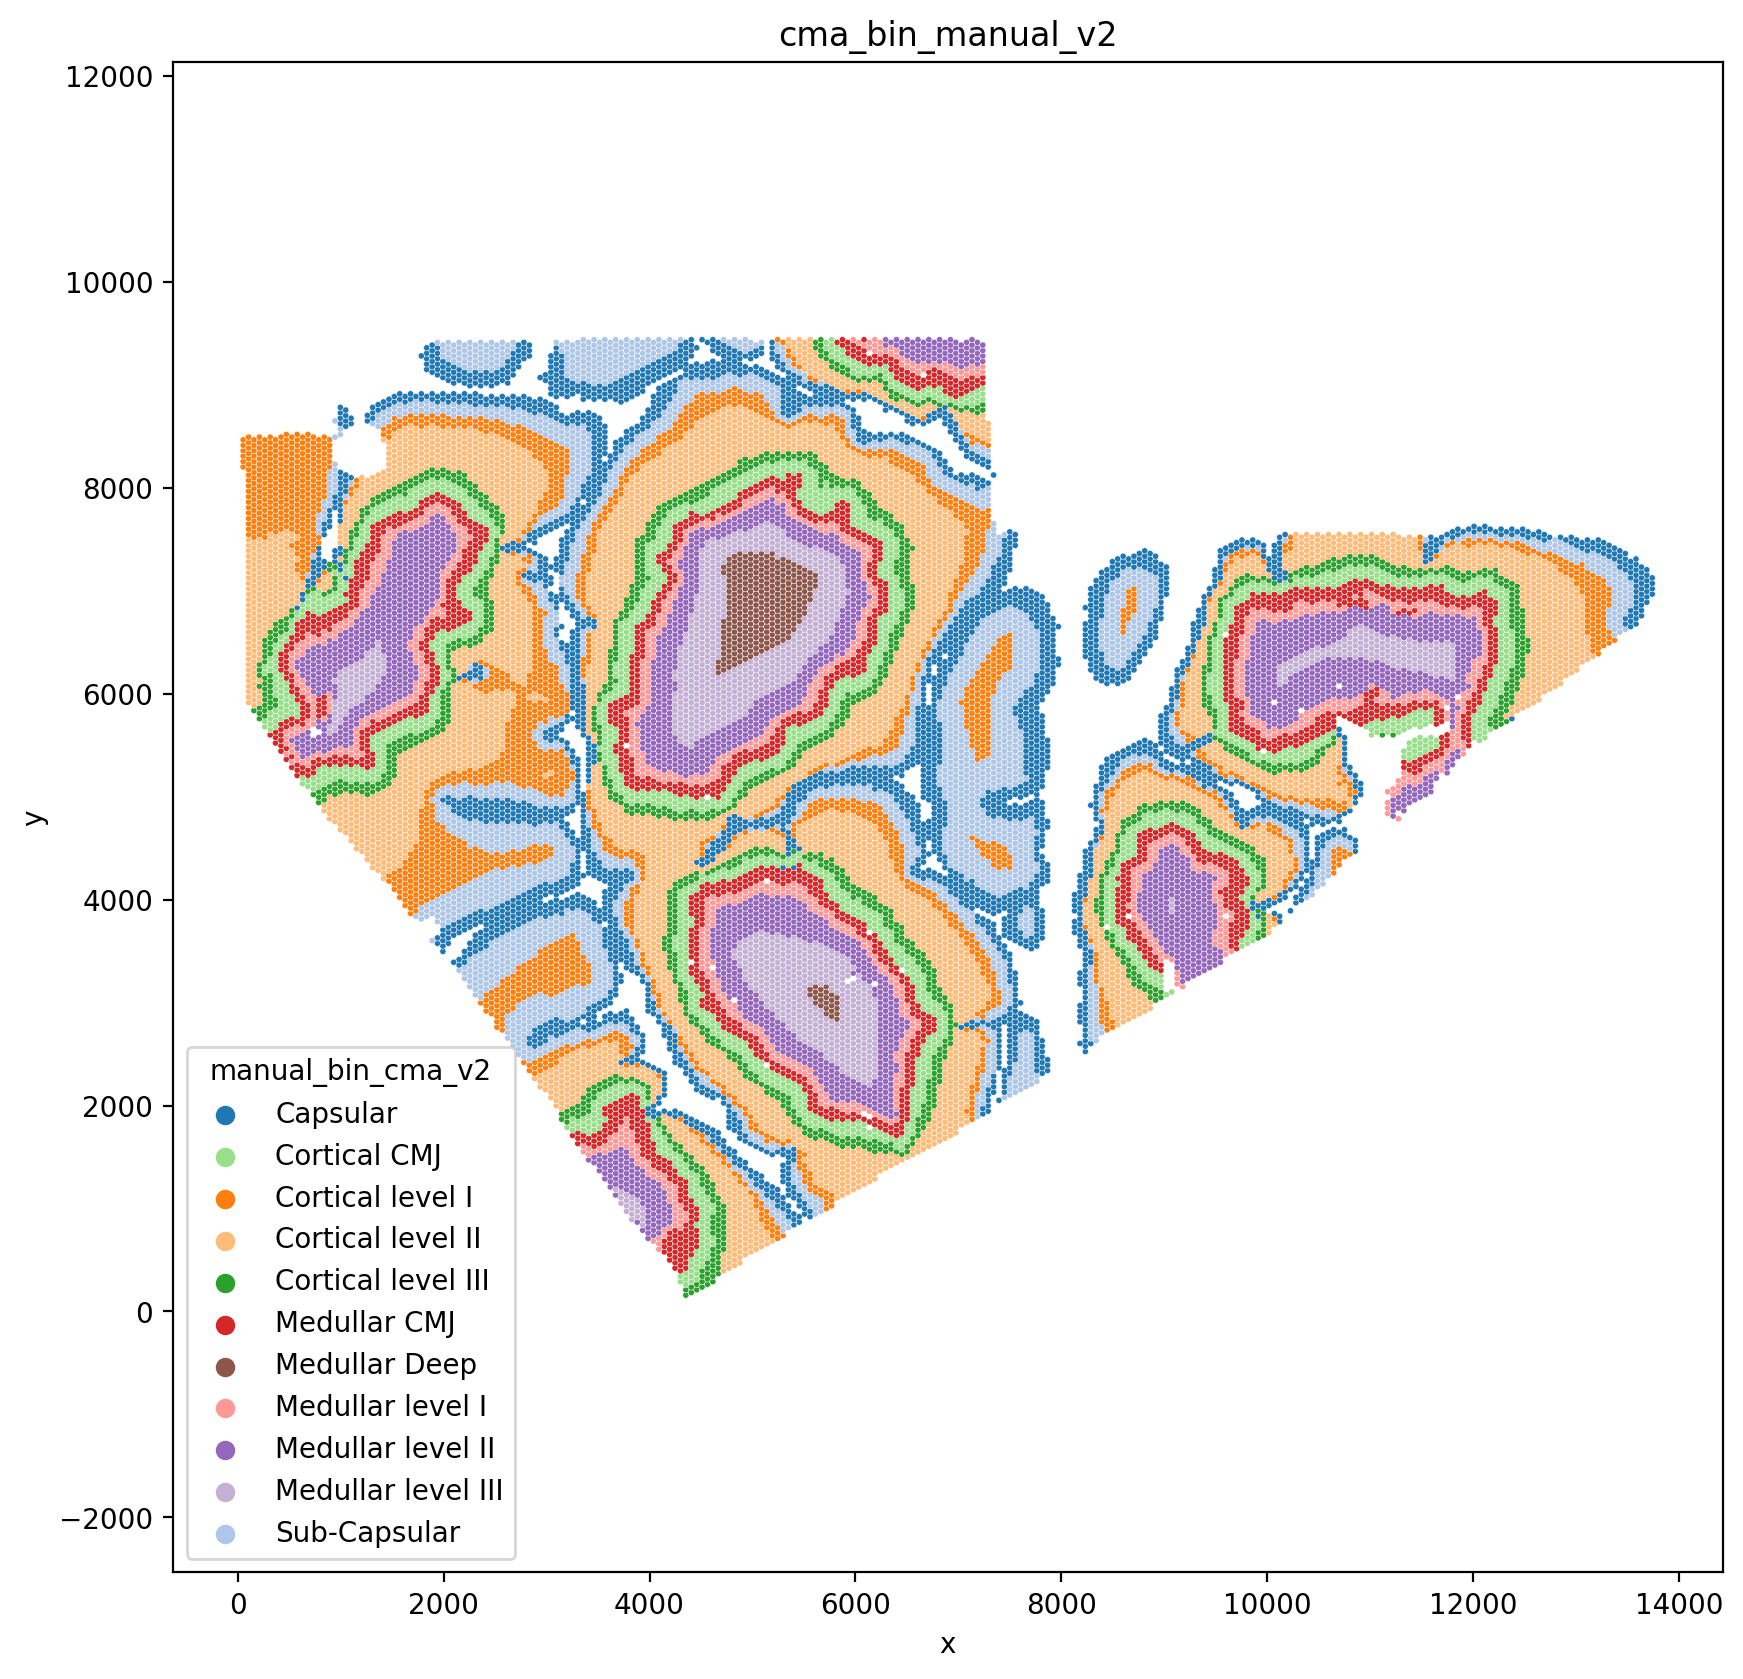

In [31]:
plt.figure(dpi=200, figsize=[10,10])
sns.scatterplot(df['x'],df['y'],hue=df['manual_bin_cma_v2'],palette=ct_color_map,s=5,)
plt.grid(False)
plt.title('cma_bin_manual_v2')
# plt.colorbar(aspect=30,fraction=0.03)
plt.axis('equal')
# plt.savefig('/nfs/team205/ny1/ThymusSpatialAtlas/Figure2/IBEX/CMA_bin.pdf')  

(-631.5269222259521,
 14423.652509689331,
 -306.08662261962894,
 9903.069136047363)

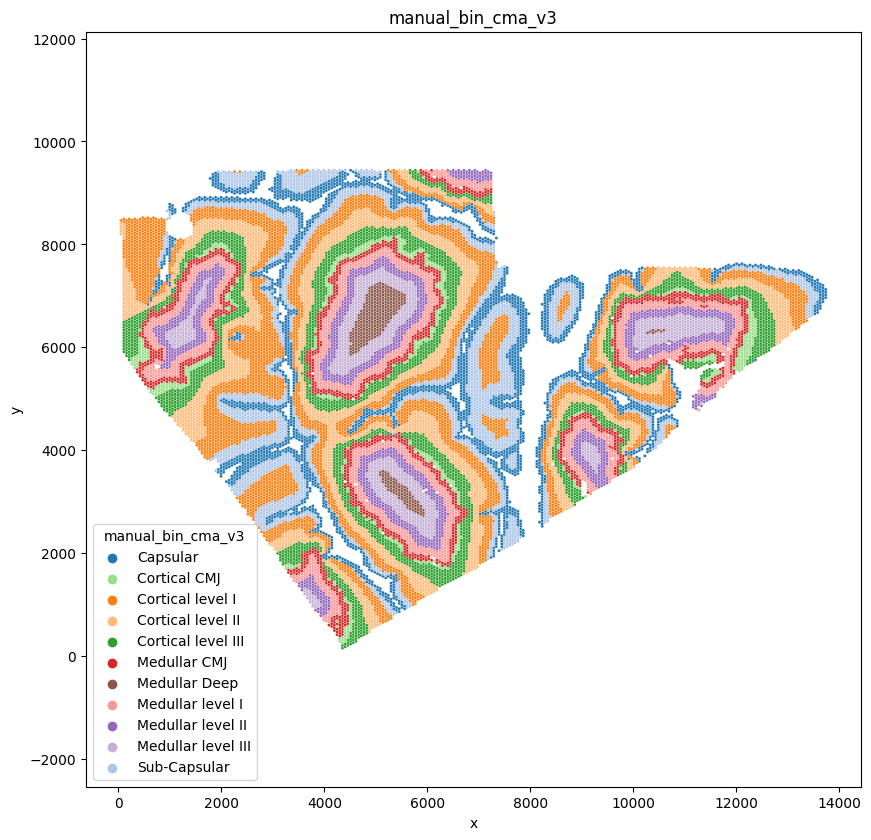

In [32]:
plt.figure(dpi=100, figsize=[10,10])
sns.scatterplot(df['x'],df['y'],hue=df['manual_bin_cma_v3'],palette=ct_color_map,s=5)
plt.grid(False)
plt.title('manual_bin_cma_v3')
plt.axis('equal')
# plt.savefig('/nfs/team205/ny1/ThymusSpatialAtlas/Figure2/IBEX/CMA_bin.pdf')  

In [33]:
# measure distance to annotation level 1 with ma resolution 
ie.dist2cluster(df,'tissue_annotations',distM,resolution=1,calc_dist=True)

{'Cortex': array([  0.        ,   0.        ,   0.        , ..., 104.875     ,
        104.875     , 117.31895983]),
 'Edge': array([937.48735088, 949.71413671, 956.96491909, ...,   0.        ,
          0.        ,   0.        ]),
 'HS': array([2448.84423492, 2490.26818702, 2532.10646402, ..., 1816.7602844 ,
        1833.42835325, 1851.44012275]),
 'Medulla': array([1326.94229422, 1311.22124709, 1297.44225725, ..., 1526.72629725,
        1532.15358324, 1539.35890406]),
 'PVS': array([1264.82369592, 1304.63921663, 1345.33190507, ..., 1523.09615456,
        1526.72633933, 1532.15358324])}

In [34]:
# save full image data for all channels and morphological features as CSV 
df.to_csv(path+'full_morphology_data.csv')

In [35]:
df

x            y tissue_annotations  \
index                                                 
155       52.799416  8203.203125             Cortex   
156       52.799416  8255.786133             Cortex   
157       52.799416  8308.369141             Cortex   
158       52.799416  8360.952148             Cortex   
159       52.799416  8413.536133             Cortex   
...             ...          ...                ...   
47116  13634.451172  7230.520508               Edge   
47291  13739.326172  6967.604492               Edge   
47292  13739.326172  7020.187500               Edge   
47293  13739.326172  7072.770996               Edge   
47294  13739.326172  7125.354004               Edge   

       tissue_annotations_number annotation_lobules_0  \
index                                                   
155                            4            lobules_6   
156                            4            lobules_6   
157                            4            lobules_6   
158                            4            lobules_6   
159                            4            lobules_6   
...                          ...                  ...   
47116                          5            lobules_0   
47291                          5            lobules_0   
47292                          5            lobules_0   
47293                          5            lobules_0   
47294                          5            lobules_0   

       annotation_lobules_0_number annotation_lobules_1  \
index                                                     
155                              7            lobules_0   
156                              7            lobules_0   
157                              7            lobules_0   
158                              7            lobules_0   
159                              7            lobules_0   
...                            ...                  ...   
47116                            1           lobules_25   
47291                            1           lobules_25   
47292                            1           lobules_25   
47293                            1           lobules_25   
47294                            1           lobules_25   

       annotation_lobules_1_number tissue_annotations_full  \
index                                                        
155                              1                  Cortex   
156                              1                  Cortex   
157                              1                  Cortex   
158                              1                  Cortex   
159                              1                  Cortex   
...                            ...                     ...   
47116                           26                    Edge   
47291                           26                    Edge   
47292                           26                    Edge   
47293                           26                    Edge   
47294                           26                    Edge   

       L2_dist_tissue_annotations_full_Cortex  ...  manual_bin_cma_v2  \
index                                          ...                      
155                                 58.935426  ...   Cortical level I   
156                                 52.583008  ...   Cortical level I   
157                                 52.583008  ...   Cortical level I   
158                                 52.583984  ...   Cortical level I   
159                                 52.583984  ...   Cortical level I   
...                                       ...  ...                ...   
47116                              141.765335  ...           Capsular   
47291                              117.319179  ...           Capsular   
47292                              117.319179  ...           Capsular   
47293                              148.521915  ...           Capsular   
47294                              159.834053  ...           Capsular   

       manual_bin_cma_v2_int    cma

# add morphology data to cell features 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dfseg = pd.read_csv(path+'full_channel_segmentation.csv')
dfmorph = pd.read_csv(path+'full_morphology_data.csv')
import os
os.chdir('/nfs/team205/ny1/ThymusSpatialAtlas/ImageSpot/')
import ibextractor2d as ie
import seaborn as sns

In [9]:
dfmorph.columns[3:]

Index(['tissue_annotations', 'tissue_annotations_number',
       'annotation_lobules_0', 'annotation_lobules_0_number',
       'annotation_lobules_1', 'annotation_lobules_1_number',
       'tissue_annotations_cma', 'L2_dist_tissue_annotations_cma_Cortex',
       'L2_dist_tissue_annotations_cma_Edge',
       'L2_dist_tissue_annotations_cma_Medulla',
       'L2_dist_tissue_annotations_cma_PVS', 'cma_v2', 'manual_bin_cma_v2',
       'manual_bin_cma_v2_int', 'cma_v3', 'manual_bin_cma_v3',
       'manual_bin_cma_v3_int', 'L2_dist_tissue_annotations_Cortex',
       'L2_dist_tissue_annotations_Edge', 'L2_dist_tissue_annotations_HS',
       'L2_dist_tissue_annotations_Medulla', 'L2_dist_tissue_annotations_PVS'],
      dtype='object')

make sure the coordinate systems are alligned e.g. axes are not flipped


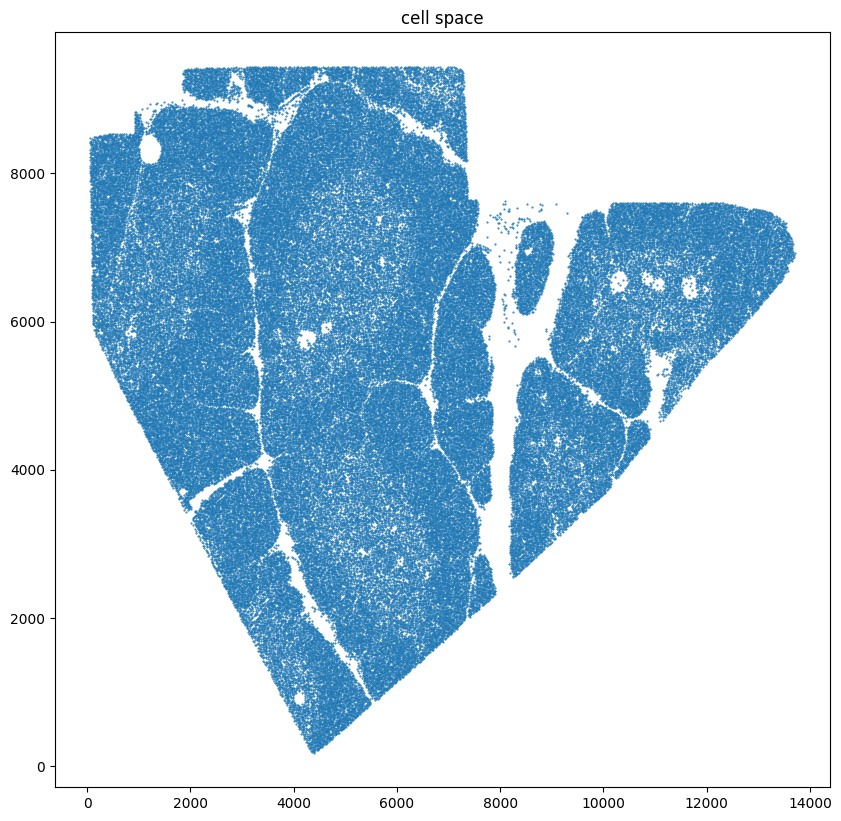

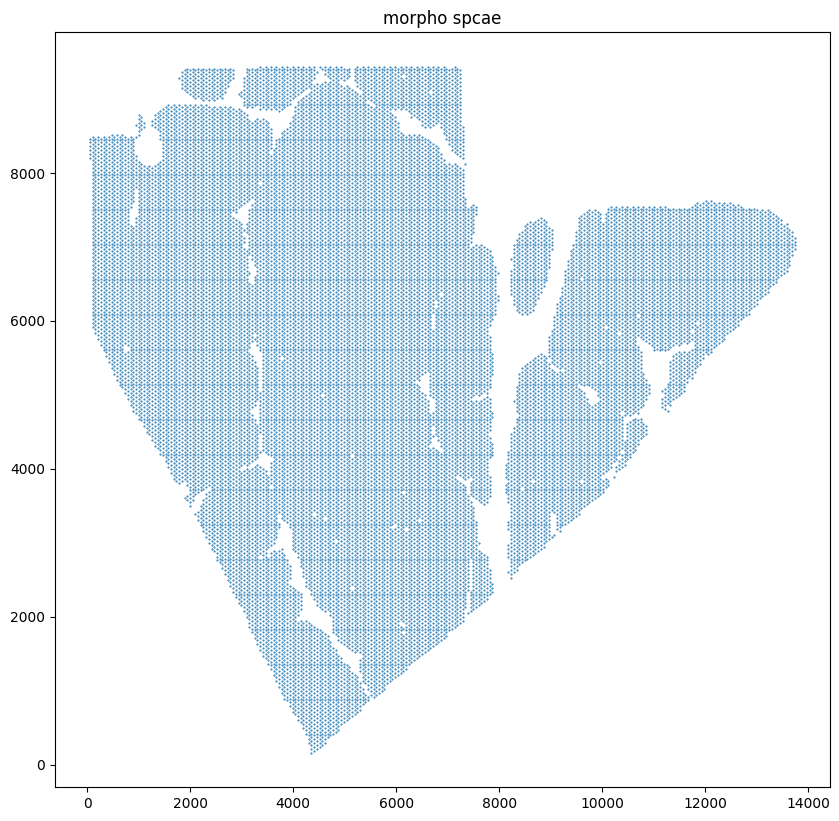

migrating - tissue_annotations to segmentations
migrating - tissue_annotations_number to segmentations
migrating - annotation_lobules_0 to segmentations
migrating - annotation_lobules_0_number to segmentations
migrating - annotation_lobules_1 to segmentations
migrating - annotation_lobules_1_number to segmentations
migrating - tissue_annotations_cma to segmentations
migrating - L2_dist_tissue_annotations_cma_Cortex to segmentations
migrating - L2_dist_tissue_annotations_cma_Edge to segmentations
migrating - L2_dist_tissue_annotations_cma_Medulla to segmentations
migrating - L2_dist_tissue_annotations_cma_PVS to segmentations
migrating - cma_v2 to segmentations
migrating - manual_bin_cma_v2 to segmentations
migrating - manual_bin_cma_v2_int to segmentations
migrating - cma_v3 to segmentations
migrating - manual_bin_cma_v3 to segmentations
migrating - manual_bin_cma_v3_int to segmentations
migrating - L2_dist_tissue_annotations_Cortex to segmentations
migrating - L2_dist_tissue_annotatio

In [10]:
dfseg = ie.anno_to_cells(
    df_cells=dfseg,
    df_morphology=dfmorph,
    numerical_annotations= dfmorph.columns[3:],
    # ['L2_dist_tissue_annotations_Cortex','L2_dist_tissue_annotations_Edge', 'L2_dist_tissue_annotations_Medulla', 'cma_v2','cma_v3','L2_dist_tissue_annotations_HS','L2_dist_tissue_annotations_PVS'],
    categorical_annotation_names=None,
    # ['tissue_annotations', 'annotation_lobules_0', 'annotation_lobules_1'],
    categorical_annotation_number_names=None,
    # ['tissue_annotations_number', 'annotation_lobules_0_number','annotation_lobules_1_number'],
)
    

/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


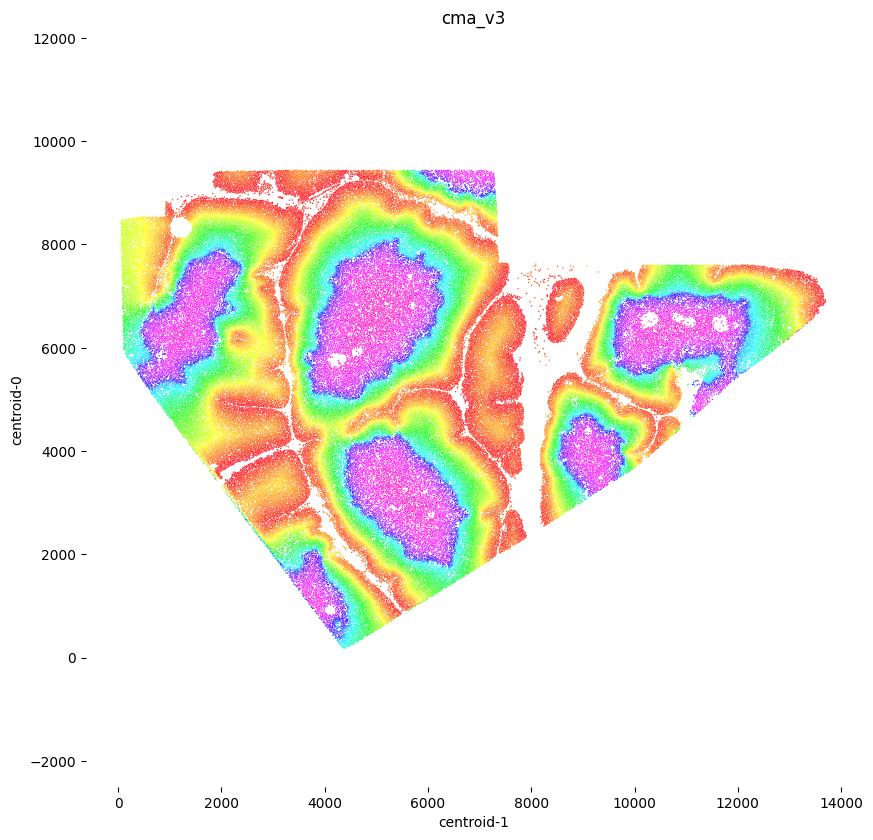

In [13]:
# fig, ax = plt.subplots()
plt.figure(dpi=100, figsize=[10,10])
sns.scatterplot(dfseg['centroid-1'],dfseg['centroid-0'],c= dfseg['cma_v3'],cmap='gist_rainbow',s=1)
# plt.scatter(df['x'],df['y'],c=(df['tissue_annotations']=='Cortex'),s=8,)
plt.grid(False)
plt.title('cma_v3')
plt.axis('equal')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
# plt.savefig('/nfs/team205/ny1/ThymusSpatialAtlas/Figure2/IBEX/CMA_bin.pdf')  

plt.show()

In [15]:
ct_order = ['Capsular','Sub-Capsular','Cortical level I','Cortical level II','Cortical level III','Cortical CMJ','Medullar CMJ','Medullar level I','Medullar level II','Medullar level III','Medullar Deep']
ct_color_map = dict(zip(ct_order, np.array(sns.color_palette("tab20", len(ct_order)))[range(len(ct_order))]))

/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


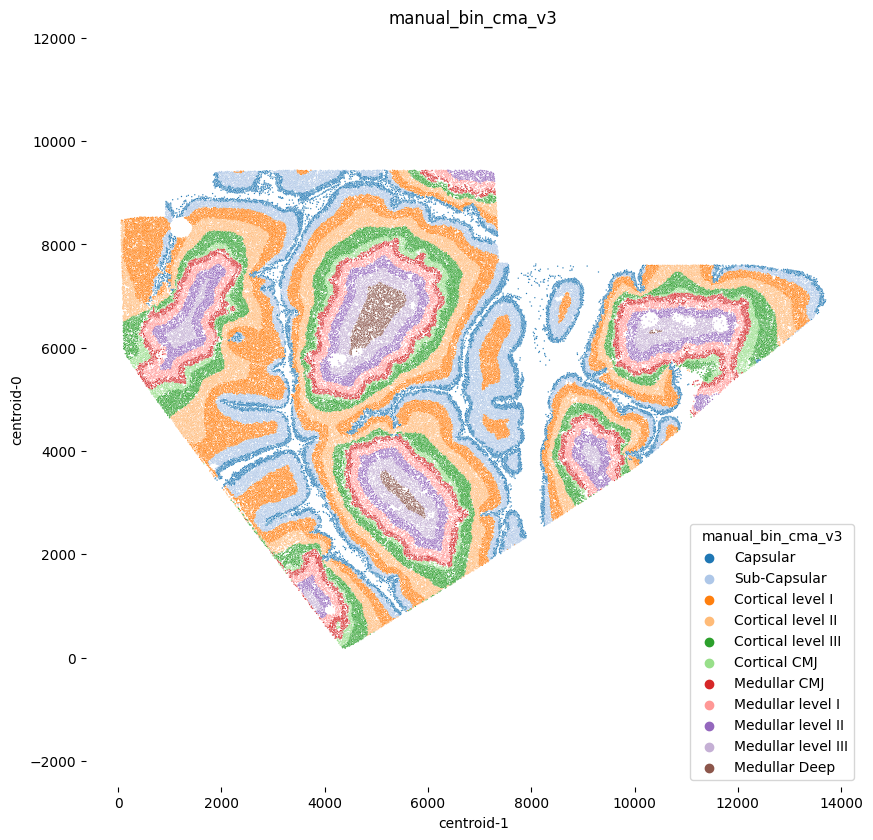

In [16]:
# fig, ax = plt.subplots()
plt.figure(dpi=100, figsize=[10,10])
dfsegsub = dfseg[dfseg['manual_bin_cma_v3'].isin(ct_order)]
sns.scatterplot(dfsegsub['centroid-1'],dfsegsub['centroid-0'],hue= dfsegsub['manual_bin_cma_v3'],palette=ct_color_map,s=1,hue_order=ct_order)

# = plt.scatter(df['x'],df['y'],c=(df['tissue_annotations']=='Cortex'),s=8,)
plt.grid(False)
plt.title('manual_bin_cma_v3')
# plt.colorbar(aspect=30,fraction=0.03manual_bin_cma_v3_int)
plt.axis('equal')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
# plt.savefig('/nfs/team205/ny1/ThymusSpatialAtlas/Figure2/IBEX/CMA_bin.pdf')  

plt.show()

/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


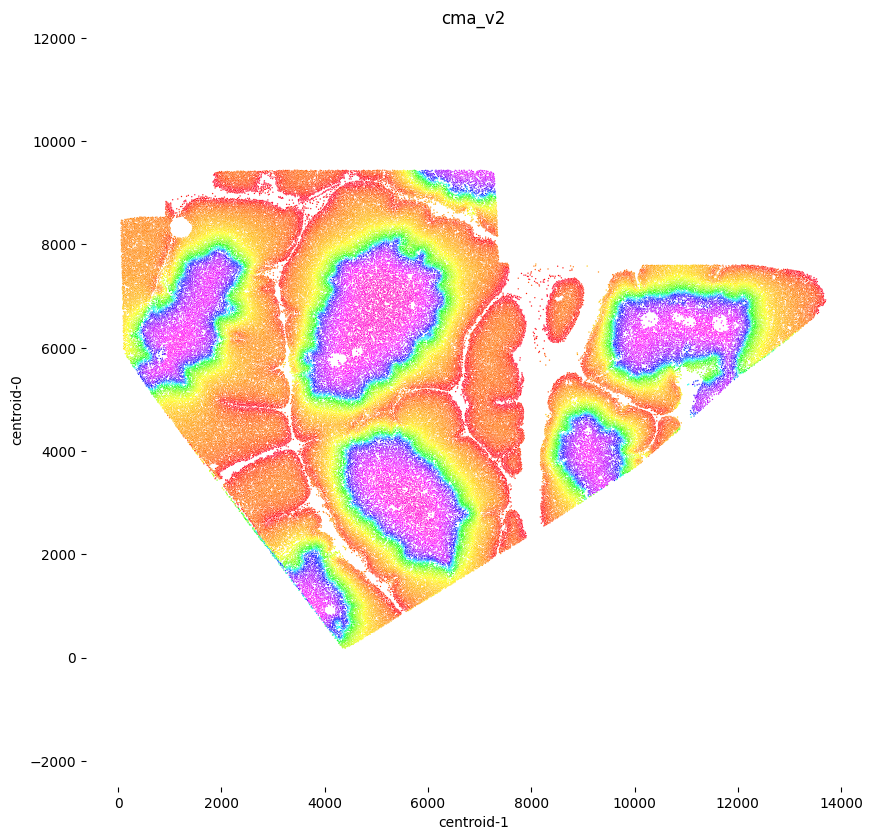

In [17]:
# fig, ax = plt.subplots()
plt.figure(dpi=100, figsize=[10,10])
sns.scatterplot(dfseg['centroid-1'],dfseg['centroid-0'],c= dfseg['cma_v2'],cmap='gist_rainbow',s=1)
# plt.scatter(df['x'],df['y'],c=(df['tissue_annotations']=='Cortex'),s=8,)
plt.grid(False)
plt.title('cma_v2')
# plt.colorbar(aspect=30,fraction=0.03)
plt.axis('equal')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
# plt.savefig('/nfs/team205/ny1/ThymusSpatialAtlas/Figure2/IBEX/CMA_bin.pdf')  

plt.show()

/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


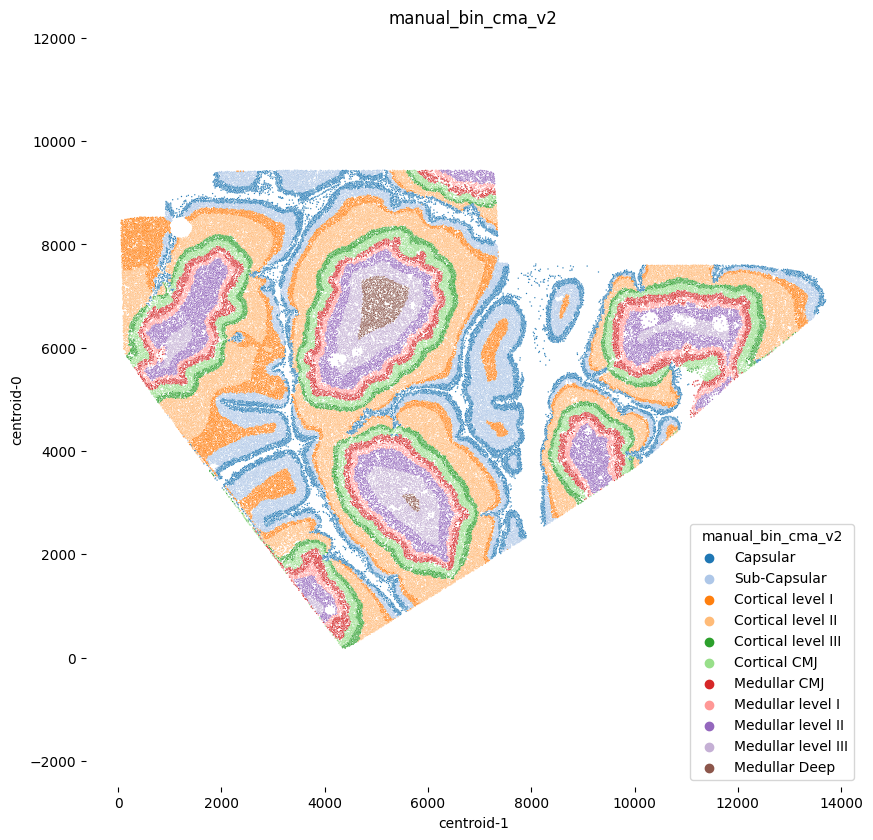

In [18]:
# fig, ax = plt.subplots()
plt.figure(dpi=100, figsize=[10,10])
dfsegsub = dfseg[dfseg['manual_bin_cma_v2'].isin(ct_order)]
sns.scatterplot(dfseg['centroid-1'],dfseg['centroid-0'],hue= dfseg['manual_bin_cma_v2'],palette=ct_color_map,s=1,hue_order=ct_order)

# = plt.scatter(df['x'],df['y'],c=(df['tissue_annotations']=='Cortex'),s=8,)
plt.grid(False)
plt.title('manual_bin_cma_v2')
# plt.colorbar(aspect=30,fraction=0.03manual_bin_cma_v3_int)
plt.axis('equal')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
# plt.savefig('/nfs/team205/ny1/ThymusSpatialAtlas/Figure2/IBEX/CMA_bin.pdf')  

plt.show()

/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


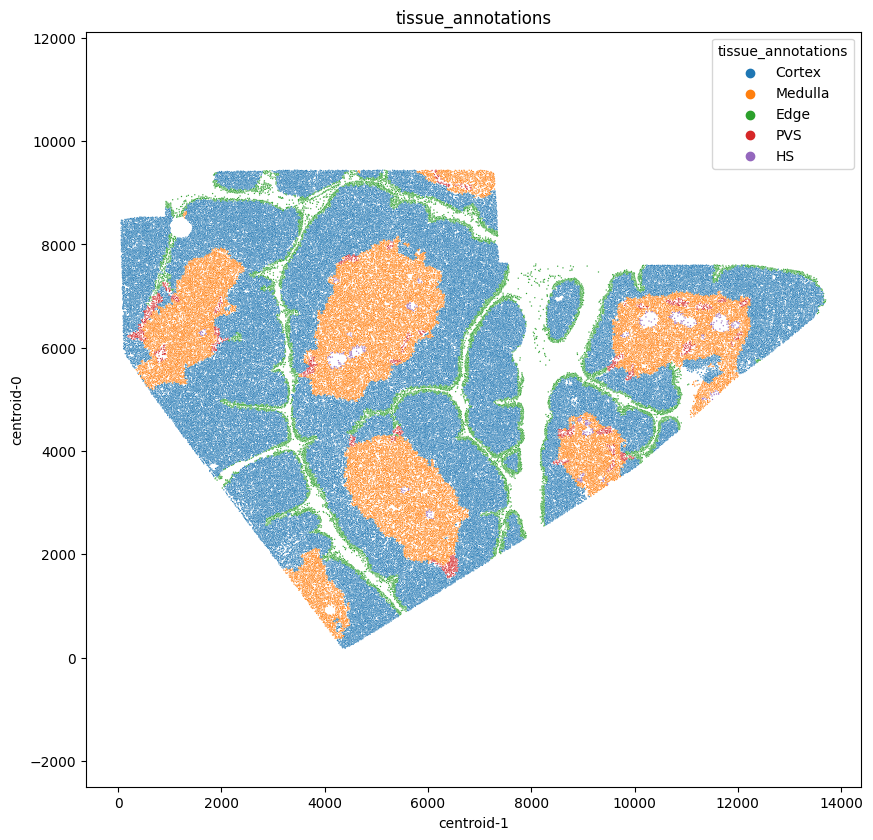

In [19]:
# fig, ax = plt.subplots()
plt.figure(dpi=100, figsize=[10,10])
sns.scatterplot(dfseg['centroid-1'],dfseg['centroid-0'],hue= dfseg['tissue_annotations'],s=1)
plt.grid(False)
plt.title('tissue_annotations')
plt.axis('equal')

plt.show()

/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


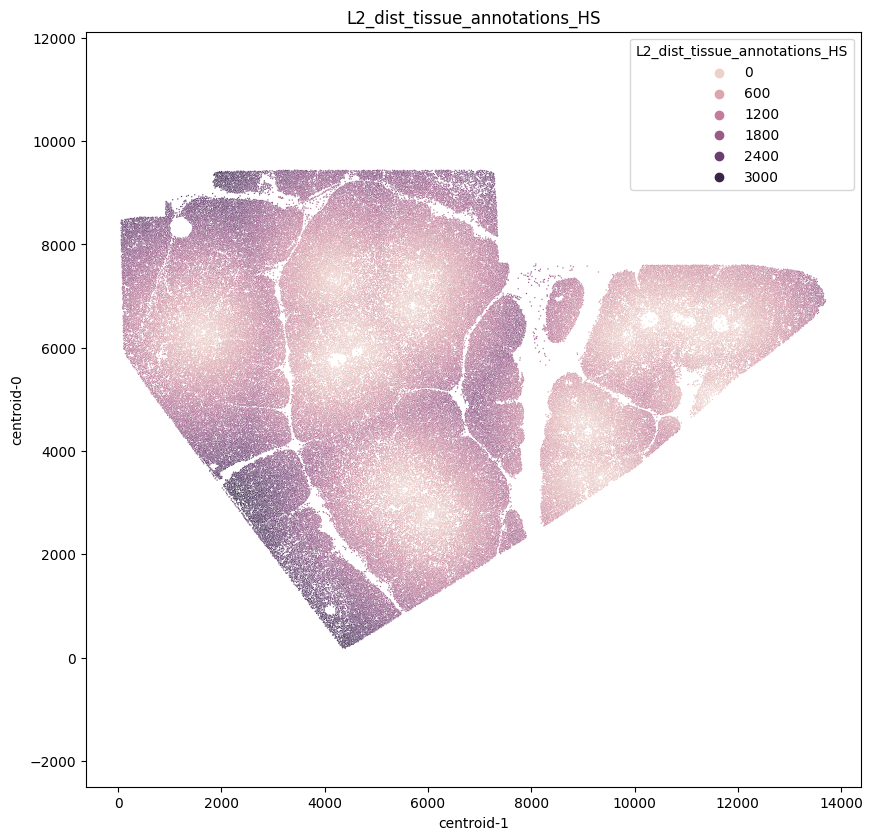

In [20]:
# fig, ax = plt.subplots()
plt.figure(dpi=100, figsize=[10,10])
sns.scatterplot(dfseg['centroid-1'],dfseg['centroid-0'],hue= dfseg['L2_dist_tissue_annotations_HS'],s=1,cmap='jet')
plt.grid(False)
plt.title('L2_dist_tissue_annotations_HS')
plt.axis('equal')

plt.show()

In [21]:
dfseg.to_csv(path+'full_channel_segmentation.csv')

# simons part csv to anndata

In [ ]:
# csv to anndata 
# batch correction 
# z scopre and processing 
# leiden clustering 